## Summary: Transforming Sales Forecasting with LSTM at Elegant Retail Solutions

### Background
Elegant Retail Solutions, a leading retail chain, faced significant challenges in accurately forecasting sales due to seasonal trends, promotions, and economic conditions. This often led to overstocking or understocking, impacting costs and customer satisfaction.

### Challenge
The company needed a sophisticated solution to improve sales forecasting accuracy and optimize inventory management.

### Solution
The data science team implemented an advanced sales forecasting model using Long Short-Term Memory (LSTM) networks. Key steps included:

1. **Data Preparation**:
   - Collected and preprocessed historical sales data.
   - Applied log transformation to stabilize variance.

2. **Model Development**:
   - Built an LSTM model with a sequential architecture.
   - Included dropout regularization to prevent overfitting.

3. **Training and Evaluation**:
   - Trained the model on historical data.
   - Validated its performance on a test set.

4. **Predictions**:
   - Used the model to predict sales for the next seven days.
   - Converted raw predictions to actionable whole numbers.

### Results
The model provided the following predicted sales for the next seven days:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted sales for Day 1: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 2: 0
Predicted sales for Day 3: 0
Predicted sales for Day 4: 0
Predicted sales for Day 5: 0
Predicted sales for Day 6: 0
Predicted sales for Day 7: 1

### Impact
The LSTM-based model led to significant benefits:
- **Reduced Inventory Costs**: Minimized overstocking.
- **Increased Sales**: Improved stock availability and customer satisfaction.
- **Enhanced Marketing**: Enabled more effective promotional planning.

### Conclusion
Elegant Retail Solutions successfully leveraged deep learning to enhance sales forecasting, leading to improved operational efficiency and a competitive edge in the market. The project demonstrated the profound impact of predictive insights on business performance.

Pandas and NumPy are used for data manipulation and numerical operations.
Seaborn and Matplotlib are used for data visualization.
TensorFlow (Keras API) is used to build and train the LSTM model.
Scikit-Learn is used for preprocessing and splitting the data into training and testing sets.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the datasets
# The training and test datasets are loaded into pandas DataFrames from CSV files.
train = pd.read_csv(r"C:\Users\KHALEELBASHA\Desktop\datasets\store sales\archive\train.csv")
test = pd.read_csv(r"C:\Users\KHALEELBASHA\Desktop\datasets\store sales\archive\test.csv")


In [3]:
#  Inspect the data
#Initial inspection of the training and test datasets, displaying the first few rows, columns, and basic information about the datasets.
print("Initial train dataset:")
train.head()

Initial train dataset:


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,Unnamed: 17
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,NaN
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,NaN
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,NaN
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,NaN
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,NaN


In [4]:
print("Columns in train dataset:")
train.columns

Columns in train dataset:


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'dcoilwtico',
       'Unnamed: 17'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    322047 non-null  float64
 17  Unnamed: 17   0 non-null       float64
dtypes: b

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1782 non-null   int64  
 1   date         1782 non-null   object 
 2   store_nbr    1782 non-null   int64  
 3   family       1782 non-null   object 
 4   onpromotion  1782 non-null   int64  
 5   city         1782 non-null   object 
 6   state        1782 non-null   object 
 7   type_x       1782 non-null   object 
 8   cluster      1782 non-null   int64  
 9   type_y       1782 non-null   object 
 10  locale       1782 non-null   object 
 11  locale_name  1782 non-null   object 
 12  description  1782 non-null   object 
 13  transferred  1782 non-null   bool   
 14  dcoilwtico   1782 non-null   float64
dtypes: bool(1), float64(1), int64(4), object(9)
memory usage: 196.8+ KB


In [7]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,3015144,24-08-2017,1,Tools,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
1,3015145,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
2,3015146,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
3,3015147,24-08-2017,1,BEVERAGES,26,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
4,3015148,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24


In [8]:
# Drop unnecessary columns
train.drop(columns=["Unnamed: 17"], inplace=True)

In [9]:
#checking if there any missing values

print(" missing values of train dataset:")
train.isnull().sum()

 missing values of train dataset:


id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

In [10]:
print("missing values of test dataset:")
test.isnull().sum()

missing values of test dataset:


id             0
date           0
store_nbr      0
family         0
onpromotion    0
city           0
state          0
type_x         0
cluster        0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dcoilwtico     0
dtype: int64

In [11]:
# Convert 'date' column to datetime
train["date"] = pd.to_datetime(train["date"], format="%Y-%m-%d", errors="coerce")
test["date"] = pd.to_datetime(test["date"], format="%d-%m-%Y", errors="coerce")

In [12]:
# Set 'date' as the index
train.set_index("date", inplace=True)

#Converts the 'date' column to datetime format.
#Sets the 'date' column as the index for the training DataFrame.

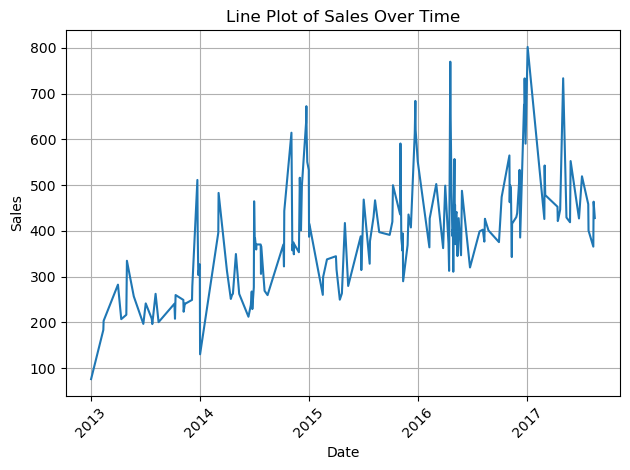

The plot shows that there is an increasing trend of sales with each year.From 2013 to 2017, the sales have increased, thus showing an upward trend.


In [13]:
# Plotting with Seaborn lineplot
sns.lineplot(x="date", y="sales", data=train, estimator='mean', err_style=None)

# Enhance the plot
plt.title('Line Plot of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

print("The plot shows that there is an increasing trend of sales with each year.From 2013 to 2017, the sales have increased, thus showing an upward trend.")

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_15604\1815552696.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y=d.index, data=d, ci=None, palette='viridis')


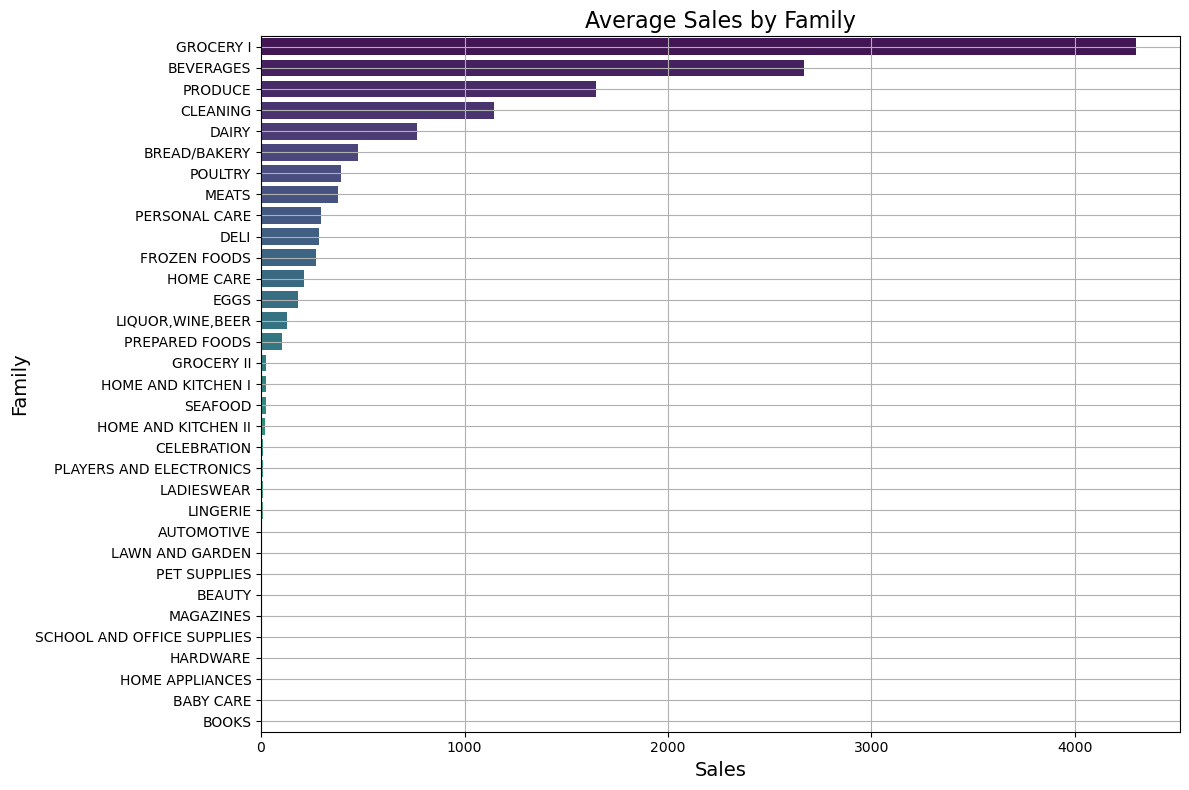

In [14]:
# : Grouping and Aggregating Data
d = train.groupby('family')['sales'].mean().sort_values(ascending=False)
d = pd.DataFrame(d)
#  Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='sales', y=d.index, data=d, ci=None, palette='viridis')

# Customize the plot
plt.title('Average Sales by Family', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Family', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_15604\3274731873.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=s.index, y='sales', data=s, ci=None, order=s.index, palette='viridis')


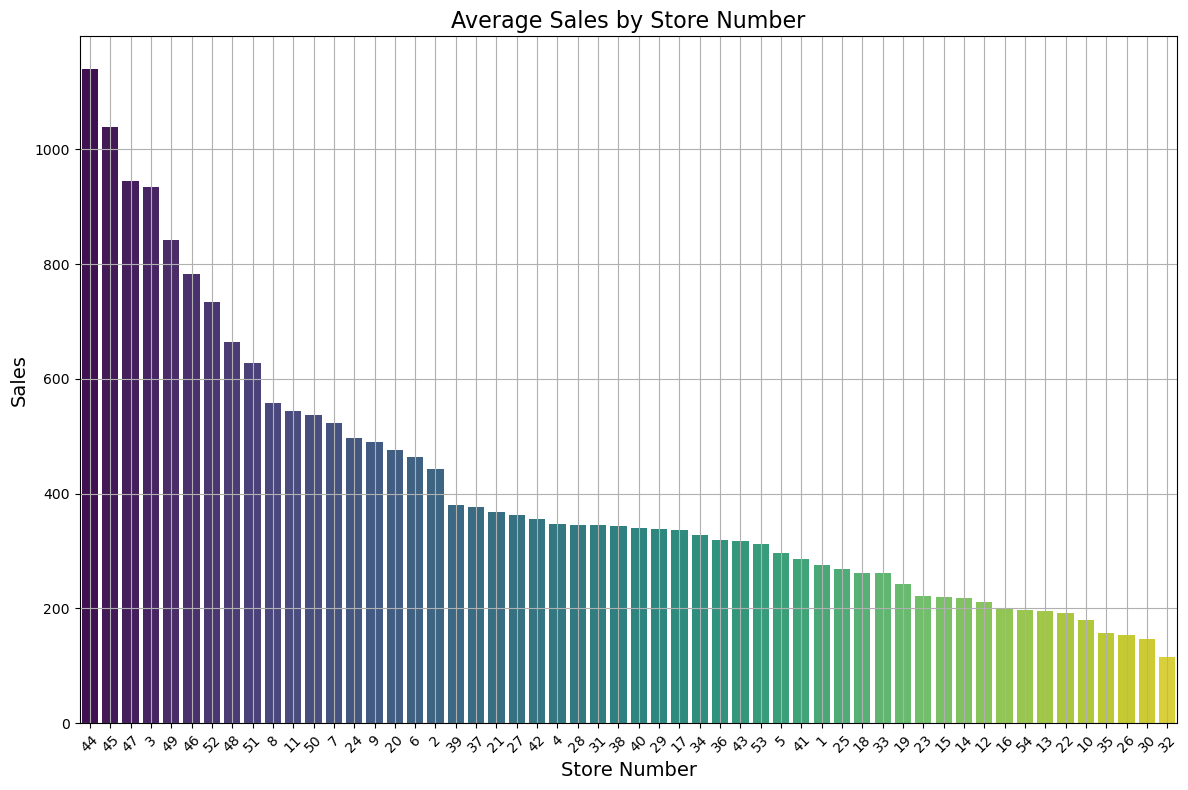

In [15]:
#  Grouping and Aggregating Data
s = train.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)
s = pd.DataFrame(s)

#  Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=s.index, y='sales', data=s, ci=None, order=s.index, palette='viridis')

# Customize the plot
plt.title('Average Sales by Store Number', fontsize=16)
plt.xlabel('Store Number', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_15604\200358157.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y=average_sales.index, data=average_sales, ci=None, palette='viridis')


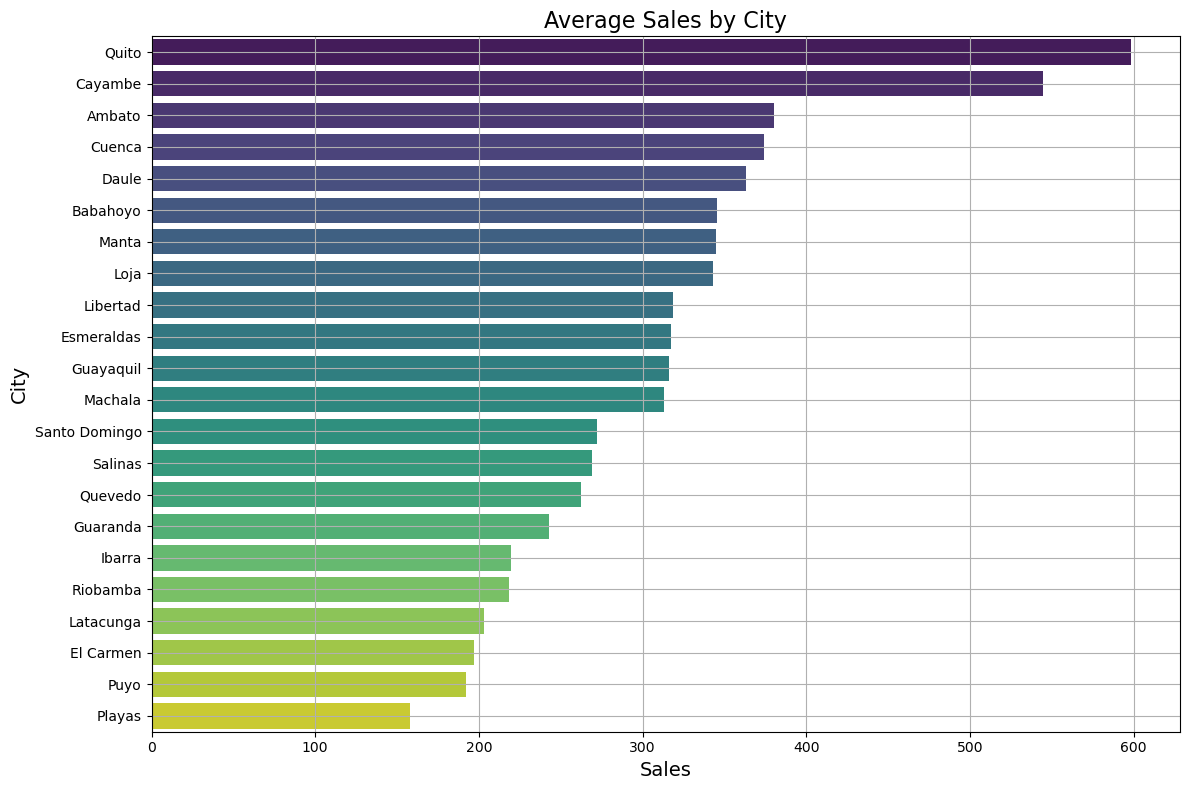

In [16]:
# Grouping and Aggregating Data
average_sales = train.groupby('city')['sales'].mean().sort_values(ascending=False)
average_sales = pd.DataFrame(average_sales)

# Step 2: Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='sales', y=average_sales.index, data=average_sales, ci=None, palette='viridis')

# Customize the plot
plt.title('Average Sales by City', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# Ensure 'sales' column exists and is not empty
if 'sales' not in train.columns:
    raise ValueError("The 'sales' column does not exist in the DataFrame.")
if train['sales'].isnull().all():
    raise ValueError("The 'sales' column is empty or contains only NaN values.")

In [18]:
# Apply log transformation to the 'sales' column
train['sales_log'] = np.log1p(train['sales'])

Applies log transformation to the 'sales' column to stabilize variance and handle skewness.
Plots the distribution of log-transformed sales.

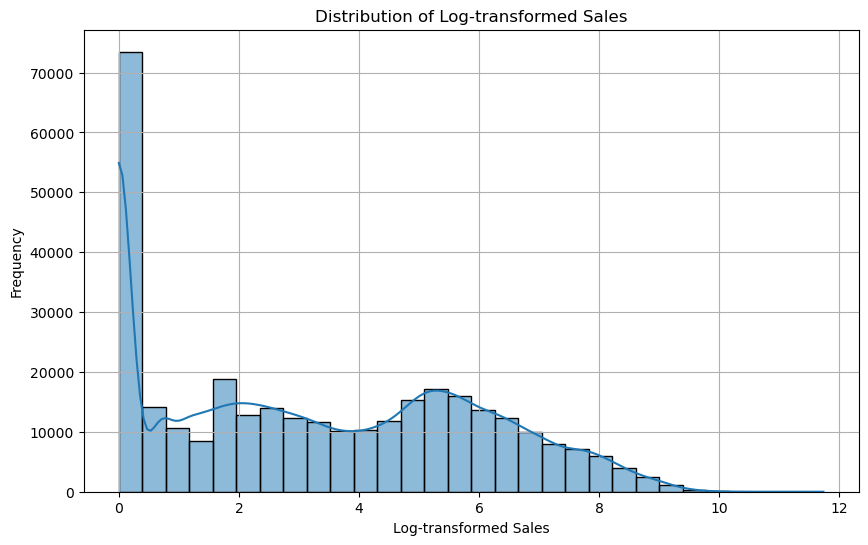

In [19]:
# Plotting the distribution of log-transformed sales
plt.figure(figsize=(10, 6))
sns.histplot(train['sales_log'], bins=30, kde=True)
plt.title('Distribution of Log-transformed Sales')
plt.xlabel('Log-transformed Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# Feature Engineering 
train['day_of_week'] = train.index.dayofweek
train['month'] = train.index.month
train['year'] = train.index.year

Extracts new features from the 'date' index: day of the week, month, and year.

In [21]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
train[['sales_log', 'onpromotion', 'dcoilwtico']] = scaler.fit_transform(train[['sales_log', 'onpromotion', 'dcoilwtico']])

Normalizes the features using MinMaxScaler to scale the data between 0 and 1.

In [22]:
# Train-Test Split
X = train[['onpromotion', 'dcoilwtico', 'day_of_week', 'month', 'year']]
y = train['sales_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the data into training and testing sets with an 80-20 split.

In [23]:
# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Define the model architecture
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

C:\Users\KHALEELBASHA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Defines a Sequential model with an LSTM layer, a Dropout layer for regularization, and a Dense output layer.

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Compiles the model using the Adam optimizer and Mean Squared Error loss function.

In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step - loss: 0.0585 - val_loss: 0.0358
Epoch 2/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0361 - val_loss: 0.0328
Epoch 3/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - loss: 0.0343 - val_loss: 0.0345
Epoch 4/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0334 - val_loss: 0.0326
Epoch 5/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - loss: 0.0330 - val_loss: 0.0320
Epoch 6/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step - loss: 0.0330 - val_loss: 0.0321
Epoch 7/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - loss: 0.0332 - val_loss: 0.0325
Epoch 8/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - loss: 0.0330 - val_loss: 0.0320
Epoch 9/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 69s 9ms/step - loss: 0.0330 - val_loss: 0.0319
Epoch 10/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 71s 9ms/step - loss: 0.0331 - val_loss: 0.0320
Epoch 11/50
8052/8052 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0329 - val_loss: 0.0317
Epoch 12/50
8052/80

Trains the model for 50 epochs with a batch size of 32, using the training data and validating on the test data.

In [27]:
# Predicting sales for the next 7 days
sequence_length = 30  # Adjust this based on your preference and data characteristics
last_sequence = train['sales_log'].values[-sequence_length:]
predictions = []

for _ in range(7):
    # Reshape the last sequence to match LSTM input shape (samples, time steps, features)
    X_last = last_sequence[-sequence_length:].reshape((1, sequence_length, 1))
    
    # Predict the next value
    y_pred = model.predict(X_last)
    
    # Append the prediction to the list
    predictions.append(y_pred[0, 0])
    
    # Update the last sequence by appending the predicted value
    last_sequence = np.append(last_sequence, y_pred[0, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [28]:
# Reverse the log transformation to get predictions in the original sales scale
predicted_sales = np.expm1(predictions)

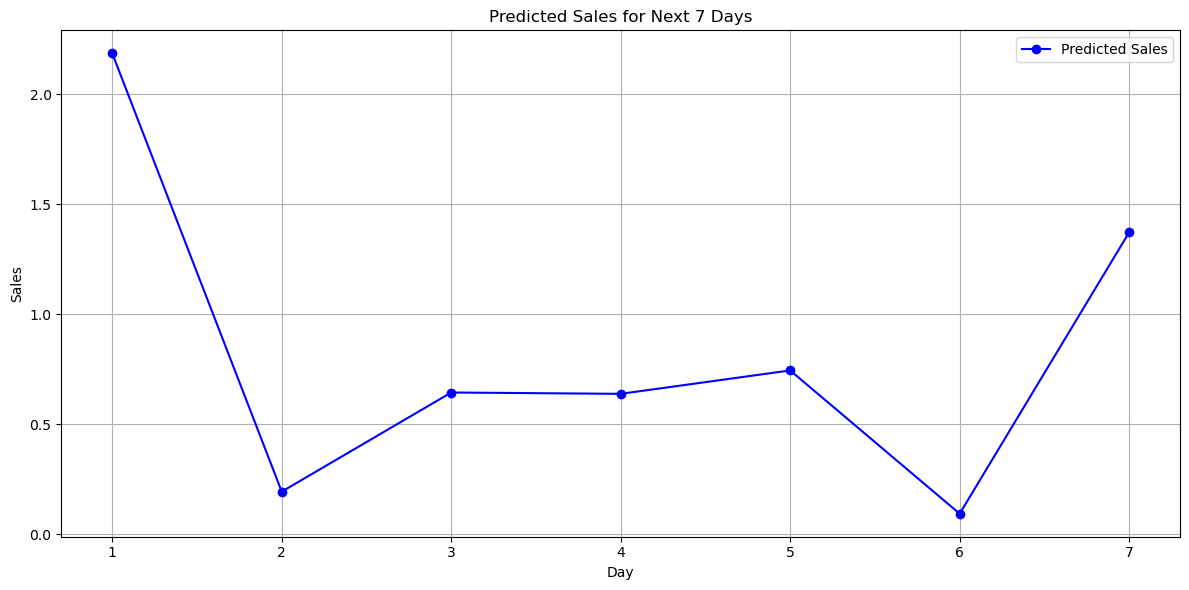

In [29]:
# Plotting the predicted sales for the next 7 days
plt.figure(figsize=(12, 6))
plt.plot(range(1, 8), predicted_sales, marker='o', linestyle='-', color='b', label='Predicted Sales')
plt.title('Predicted Sales for Next 7 Days')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Predicts sales for the next 7 days using the trained LSTM model.
Uses the last 30 days of log-transformed sales data to predict the next value in the sequence iteratively.
Applies the exponential transformation to revert log transformation for the predicted values.
Plots the predicted sales for the next 7 days.

In [30]:
# Predicting sales for the next 7 days
sequence_length = 30  # Adjust this based on your preference and data characteristics
last_sequence = train['sales_log'].values[-sequence_length:]
predictions = []

for day in range(1, 8):
    # Reshape the last sequence to match LSTM input shape (samples, time steps, features)
    X_last = last_sequence[-sequence_length:].reshape((1, sequence_length, 1))
    
    # Predict the next value
    y_pred = model.predict(X_last)
    
    # Append the prediction to the list
    predictions.append(y_pred[0, 0])
    
    # Update the last sequence by appending the predicted value
    last_sequence = np.append(last_sequence, y_pred[0, 0])
    
    # Print the predicted sales for the current day
    print(f"Predicted sales for Day {day}: {np.expm1(predictions[-1])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted sales for Day 1: 2.185885429382324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted sales for Day 2: 0.19277381896972656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 3: 0.6436408758163452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 4: 0.637565016746521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 5: 0.7439699172973633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 6: 0.0924902856349945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted sales for Day 7: 1.3718600273132324


In [31]:
# Predicting sales for the next 7 days
sequence_length = 30  # Adjust this based on your preference and data characteristics
last_sequence = train['sales_log'].values[-sequence_length:]
predictions = []

for day in range(1, 8):
    # Reshape the last sequence to match LSTM input shape (samples, time steps, features)
    X_last = last_sequence[-sequence_length:].reshape((1, sequence_length, 1))
    
    # Predict the next value
    y_pred = model.predict(X_last)
    
    # Append the prediction to the list
    predictions.append(y_pred[0, 0])
    
    # Update the last sequence by appending the predicted value
    last_sequence = np.append(last_sequence, y_pred[0, 0])
    
    # Print the predicted sales for the current day as an integer
    print(f"Predicted sales for Day {day}: {int(np.expm1(predictions[-1]))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted sales for Day 1: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted sales for Day 2: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted sales for Day 3: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted sales for Day 4: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted sales for Day 5: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted sales for Day 6: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted sales for Day 7: 1
